In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('/home/jovyan/Project_Folder/Dry_Bean_Dataset.xlsx')

In [3]:
#target_mapping = {cls: idx for idx, cls in enumerate(data['Class'].unique())}
#data['Class'] = data['Class'].map(target_mapping)

In [4]:
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Confusion Matrix:
 [[354   0  28   0   1   2  10]
 [  0 161   0   0   0   0   0]
 [ 17   0 447   0  10   2   3]
 [  0   0   0 967   2  19  55]
 [  2   0   9   3 561   0  13]
 [  4   0   0  23   0 580  12]
 [  0   0   1  73   9  13 703]]
Accuracy: 0.92384916748286
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.92      0.93      0.93       479
    DERMASON       0.91      0.93      0.92      1043
       HOROZ       0.96      0.95      0.96       588
       SEKER       0.94      0.94      0.94       619
        SIRA       0.88      0.88      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [7]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                 importance
ShapeFactor3       0.101782
Perimeter          0.092084
Compactness        0.090034
ShapeFactor1       0.089961
MinorAxisLength    0.083383
ConvexArea         0.078290
MajorAxisLength    0.074778
AspectRation       0.062411
Eccentricity       0.061701
EquivDiameter      0.060680
roundness          0.055100
Area               0.052690
ShapeFactor2       0.038729
ShapeFactor4       0.029474
Solidity           0.017622
Extent             0.011281


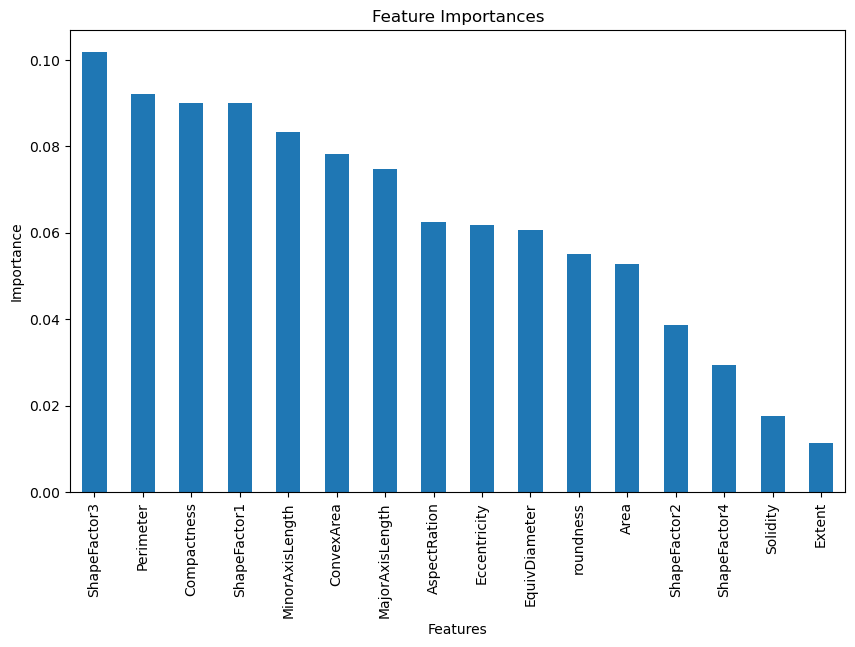

In [8]:
plt.figure(figsize=(10, 6))
feature_importances['importance'].plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()